In [1]:
from torchHHT import hht, visualization
import torch
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

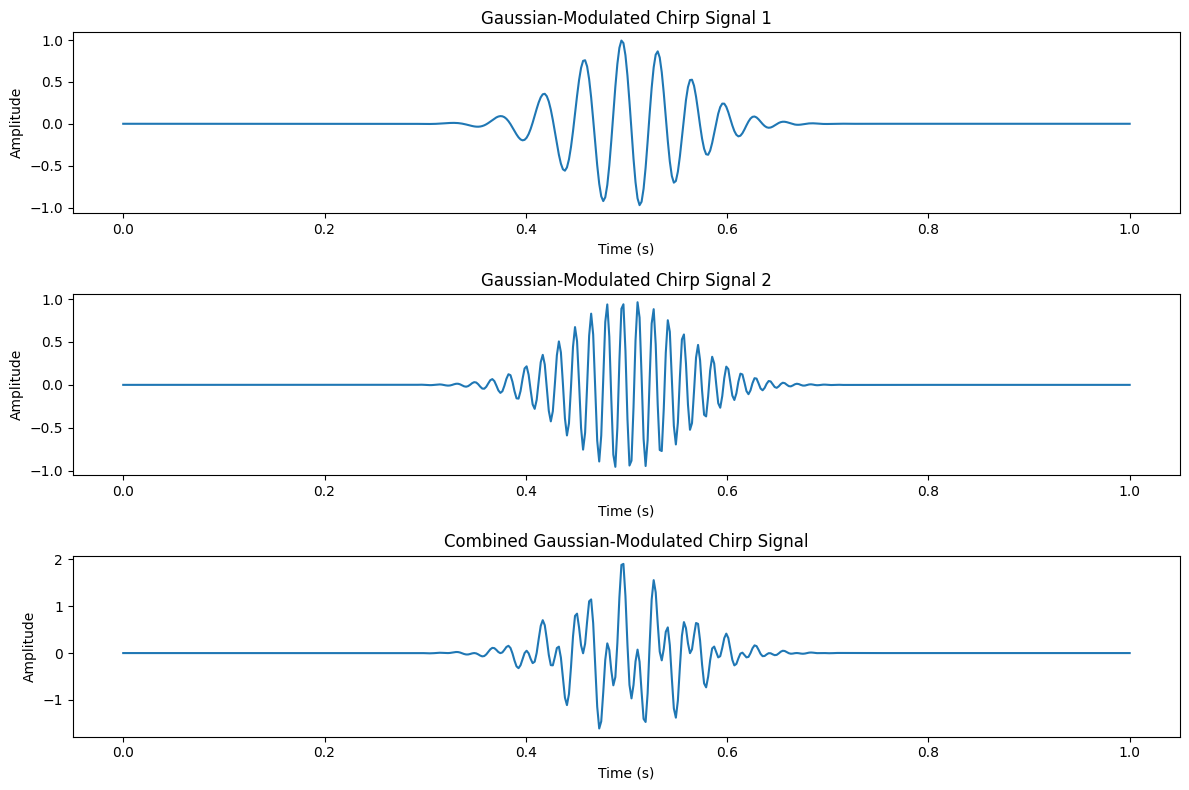

Tensor shape: (3, 500)
combined Tensor shape: torch.Size([500])


In [2]:
import numpy as np
from scipy.signal import chirp, gausspulse
import matplotlib.pyplot as plt

# Parameters
duration = 1     # seconds
fs = 500              # sampling rate, Hz
t = np.linspace(0, duration, int(fs * duration))

# Generate the chirp signals
chirp1 = chirp(t, f0=5, f1=50, t1=duration, method='linear')
chirp2 = chirp(t, f0=40, f1=90, t1=duration, method='linear')

# Generate Gaussian envelopes
gaussian_envelope1 = gausspulse(t - duration / 2, fc=65, bw=0.1, bwr=-6, retquad=False, retenv=True)[1]
gaussian_envelope2 = gausspulse(t - duration / 2, fc=65, bw=0.1, bwr=-6, retquad=False, retenv=True)[1]

# Apply Gaussian modulation
modulated_chirp1 = chirp1 * gaussian_envelope1
modulated_chirp2 = chirp2 * gaussian_envelope2

# Combine the modulated chirp signals
combined_signal = modulated_chirp1 + modulated_chirp2

# Create a tensor by stacking the signals along a new axis
tensor = np.stack([modulated_chirp1, modulated_chirp2, combined_signal], axis=0)
combined_tensor = torch.from_numpy(combined_signal)

# Plot the signals
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(t, modulated_chirp1)
plt.title('Gaussian-Modulated Chirp Signal 1')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(3, 1, 2)
plt.plot(t, modulated_chirp2)
plt.title('Gaussian-Modulated Chirp Signal 2')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(3, 1, 3)
plt.plot(t, combined_signal)
plt.title('Combined Gaussian-Modulated Chirp Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

# Output the tensor shape
print("Tensor shape:", tensor.shape)
print("combined Tensor shape:", combined_tensor.shape)


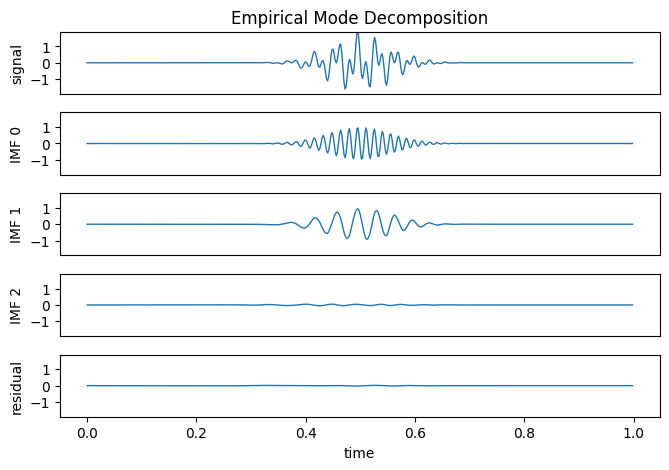

In [3]:
imfs, imfs_env, imfs_freq = hht.hilbert_huang(combined_tensor, fs, num_imf=3)
visualization.plot_IMFs(combined_tensor, imfs, fs, save_fig="exampleHHT.pdf")